# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## 1. Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
![alt text](https://snipboard.io/DSFTtz.jpg)

#### Answer
![alt text](https://snipboard.io/DSFTtz.jpg)

## 2. Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [6]:
# Libraries
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")

In [7]:
# Load the Boston dataset
boston_dataset = load_boston()


# Convert the dataset into a pandas dataframe
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['target'] = boston_dataset.target
from sklearn.model_selection import train_test_split
y = boston_df['target']
X = boston_df.drop(['target'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class DecisionTree():
  def __init__(self, X, y, min_leaf=20):
    self.X = X
    self.y = y
    self.min_leaf = min_leaf
    self.Tree = None

  class NODE(object):
    def __init__(self,feature,value,L=None,R=None):
      self.feature = feature
      self.value = value
      self.L = L
      self.R = R
      self.n_samples = []
      self.mean = 0
      self.is_root = False
    



  def find_feat_val(self,df,y):
      RMSE = np.inf
      VAL = 0
      COL = ''
      if isinstance(df, pd.Series):
        rmse,val = self.calc_rmse(df,y)
        return val,df.name

      else:
        for colname, column in df.iteritems():
            rmse,val = self.calc_rmse(column,y)
            
            if RMSE > rmse:
                RMSE = rmse
                VAL = val
                COL = colname

        return VAL,COL
    

  def calc_rmse(self,X,y):
      # concatenate feature and target to easily sort
      df = pd.concat([X,y],axis=1)
      df.sort_values(df.columns[0],inplace=True)

      # Create different splits of data and find the one with least RMSE
      
      best_rmse = np.inf

      for indx in range(df.shape[0]-1): ## CAN BE IMPROVED BY ONLY TAKE UNIQUE VALUES OF X
          left = df.iloc[:indx+1]
          right = df.iloc[indx+1:]
          left_mean = left.iloc[:,-1].mean()
          right_mean = right.iloc[:,-1].mean()
          l_rmse = np.sqrt((left.iloc[:,-1] - left_mean)**2).mean()
          r_rmse = np.sqrt((right.iloc[:,-1] - right_mean)**2).mean()
          t_rmse = r_rmse * right.shape[0]/df.shape[0] + l_rmse * left.shape[0]/df.shape[0]# Total RMSE

          if best_rmse > t_rmse: # if found a better rmse
              best_rmse = t_rmse
              split_val = df.iloc[indx,0]

    
      if "split_val" not in locals():
        split_val = y
  
      return best_rmse,split_val



  def fit(self,X,y):
    # Find best feature to split on and the value
    split_val,feature = self.find_feat_val(X,y) 
    
    # Create new node
    if self.Tree is None: # if its the first node
      
      node = self.NODE(feature,split_val) # create new node 
      
      node.is_root = True # set it as root
      self.Tree = True # set it as root
      node.mean = np.mean(y) # calc the mean of all values passed through this node
    
    else: # if its not the root
        node = self.NODE(feature,split_val) # create new node
        node.mean = np.mean(y) # calc the mean of all values passed through this node
      


    # Create left and right data and target subsets
    
    
    
    # if leaft with one feature
    if isinstance(X, pd.Series):
      node.L = NODE('leaf',split_val)
      node.L.mean = np.mean(self.y.loc[X[X  <= split_val].index])
      node.R = NODE('leaf',split_val)
      node.R.mean = np.mean(self.y.loc[X [X> split_val].index])

    ## more than 1 feature
    else:
      subset_l = X[X[feature] <= split_val].drop([feature],axis=1)
      y_l = self.y.loc[subset_l.index]
      subset_r = X[X[feature] > split_val].drop([feature],axis=1)
      y_r = self.y.loc[subset_r.index]
    
      # Check that there are features and samples to split node in left subset
      if (subset_l.shape[0] > self.min_leaf) & (subset_l.shape[1] > 0): # Check if creating left node is possible  
        y =y.drop(y_l.index)
        node.mean = np.mean(y)
        node.L = self.fit(subset_l,y_l) # below threshold


        
  # Check that there are features and samples to split node in right subset
      if (subset_r.shape[0] > self.min_leaf) & (subset_r.shape[1] > 0):
        y =y.drop(y_r.index)
        node.mean = np.mean(y)
        node.R = self.fit(subset_r,y_r) # below threshold

     
    if node.is_root:
      self.Tree = node
    else: #  node is leaf
     
      return node

  def predict(self, X):
    y_pred = []
    
    for indx,row in X.iterrows():
      curr_node = self.Tree
      
      can_go_deep = True
      while can_go_deep: # while curr_node is not a leaf

        if row[curr_node.feature] <= curr_node.value and curr_node.L: # if equal or below splitting value
          curr_node = curr_node.L
          
        elif row[curr_node.feature] > curr_node.value and curr_node.R:
          curr_node = curr_node.R

        elif np.isnan(curr_node.mean): # if stuck at a node that has no mean since no samples were classified here during training, move on to the next neearest node
          if curr_node.L:
            curr_node = curr_node.L
          else:
            curr_node = curr_node.R
          

        else: 
          can_go_deep = False ## break if node is a leaf

      y_pred.append(curr_node.mean)   
    
    return y_pred


In [ ]:
for i in [1,5,10,100]:
    min_leaf = i
    samples = X_train.shape[0]
    tree = DecisionTree(X_train,y_train,min_leaf)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
   
    print("min_leaf = {}, MSE = {}".format(min_leaf,mean_squared_error(y_pred,y_test)))





min_leaf = 1, MSE = 18.467785298837615
min_leaf = 5, MSE = 14.59369787886963
min_leaf = 10, MSE = 15.87799895507496
min_leaf = 100, MSE = 26.802722114477593


In [ ]:
tree = DecisionTree(X_train,y_train,5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


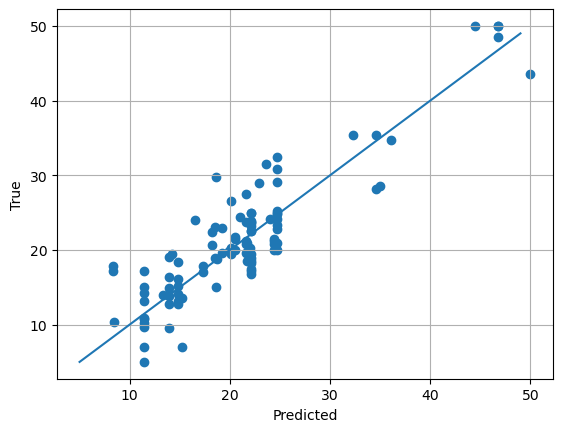

In [ ]:
plt.scatter(y_pred,y_test.to_list())
x = range(int(y_test.min()), int(y_test.max()))  # Create a list of x-values from -10 to 10
plt.xlabel('Predicted')
plt.ylabel('True')
plt.plot(x, x)  # Plot the x and y values
plt.grid()  # Add grid to the plot


## 3. Using Decision Tree for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

#### Choose train and test size


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

In [10]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

#### Choose model parameters

In [12]:
X_train.shape

(60000, 784)

In [13]:
param_grid = {'criterion':['gini','entropy'], 'min_samples_leaf':range(10,500, 50)}


#### Choose features (whether to use binary pixel values or the original continuos gray value).

#### Train sklearn Decision Tree

In [14]:
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(10, 500, 50)})

In [15]:
grid_search.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 10}

In [17]:

# Train a final model using the best value for C on the entire training set
best_clf = DecisionTreeClassifier(min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
best_clf.fit(X_train, y_train)

# Evaluate the final model on the train set
accuracy = best_clf.score(X_train, y_train)
print("Accuracy on train set using grid_search optimized hyper parameters:", round(accuracy,3))

# Evaluate the final model on the test set
accuracy = best_clf.score(X_test, y_test)
print("Accuracy on test set using grid_search optimized hyper parameters:", round(accuracy,3))



clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Accuracy on test set using without optimizing hyper parameters", round(clf.score(X_test,y_test),3))

Accuracy on train set using grid_search optimized hyper parameters: 0.922
Accuracy on test set using grid_search optimized hyper parameters: 0.869
Accuracy on test set using without optimizing hyper parameters 0.872


#### Plot the importance of each of the pixels to the final decision

In [18]:
importance = clf.feature_importances_
img_reshaped  = importance.reshape(28,28)


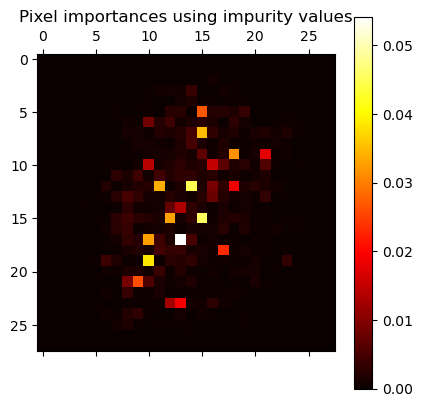

In [19]:
import matplotlib.pyplot as plt

plt.matshow(img_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

#### Estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       983
           1       0.95      0.96      0.96      1152
           2       0.83      0.86      0.84       967
           3       0.83      0.83      0.83      1034
           4       0.86      0.87      0.86       906
           5       0.84      0.80      0.82       937
           6       0.88      0.90      0.89       961
           7       0.91      0.90      0.91      1055
           8       0.80      0.79      0.80       969
           9       0.85      0.84      0.84      1036

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



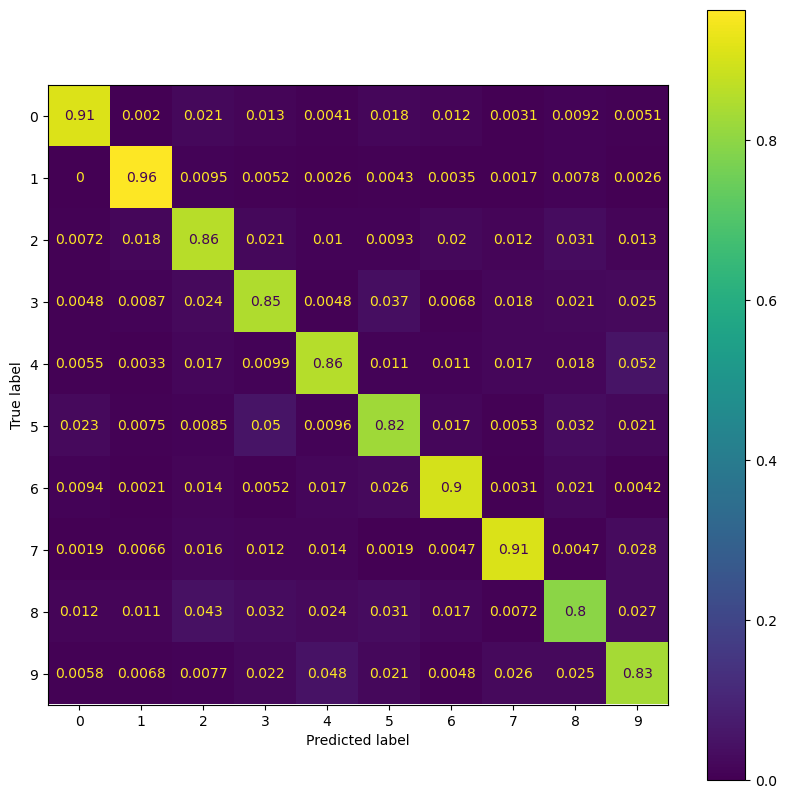

In [27]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

y_pred = best_clf.predict(X_test)

print(classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(clf, X_test, y_test, normalize='true', ax=ax);

Similar to Naive Baye's  results.<br>
The number 1 is the most easily classified number.

From the pixel purity, I can see a weak trend going from left to right.<br>
Maybe this is due to numbers like 1 that can be written tilted, 7, 4 and 9.<br>
We can also see the pixels in the middle are the most important ones.<br>


but this is mostly guess work.